**Dataset Telco Customer Churn**

UJIAN AKHIR SEMESTER <br>
Nama = Aurelia Putri Salsabila Sanusi <br>
NIM = A11.2022.14825 <br>
Kelas = DS-03 <br>
Mata Kuliah = Bengkel Koding

# **EDA**

## Eksplorasi awal

In [1]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Menampilkan 5 baris pertama
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Menampilkan ringkasan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Menampilkan statistik deskriptif
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Identifikasi Missing Value

Mengubah simbol menjadi nan untuk missing value. Yang kemudian dilakukan penjumlahan jumlah nan / value missing value pada semua kolom

In [6]:
# Mengganti nilai ' ', '-', dan empty string dengan np.nan
data.replace({' ': np.nan, '-': np.nan, '': np.nan}, inplace=True)
print("Missing values replaced with NaN.")
print(data.isnull().sum())

Missing values replaced with NaN.
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Menghitung jumlah nilai missing values dalam bentuk persen
missing_values_count = data.isnull().sum()
missing_values_percent = 100 * data.isnull().sum() / len(data)
missing_values_table = pd.DataFrame({'Total Missing': missing_values_count,
                                     'Percentage (%)': missing_values_percent})

print("Detailed Report of Missing Values:")
print(missing_values_table[missing_values_table['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False))


Detailed Report of Missing Values:
              Total Missing  Percentage (%)
TotalCharges             11        0.156183


Cek ulang jumlah missing value yang bertipe object

In [8]:
# Cek missing values dengan tipe object
object_columns = data.select_dtypes(include='object').columns
missing_in_object_columns = data[object_columns].isnull().sum()

print("Missing values in object-type columns:")
print(missing_in_object_columns[missing_in_object_columns > 0])

Missing values in object-type columns:
TotalCharges    11
dtype: int64


Memberikan visualisasi hasil dalam bentuk diagram batang

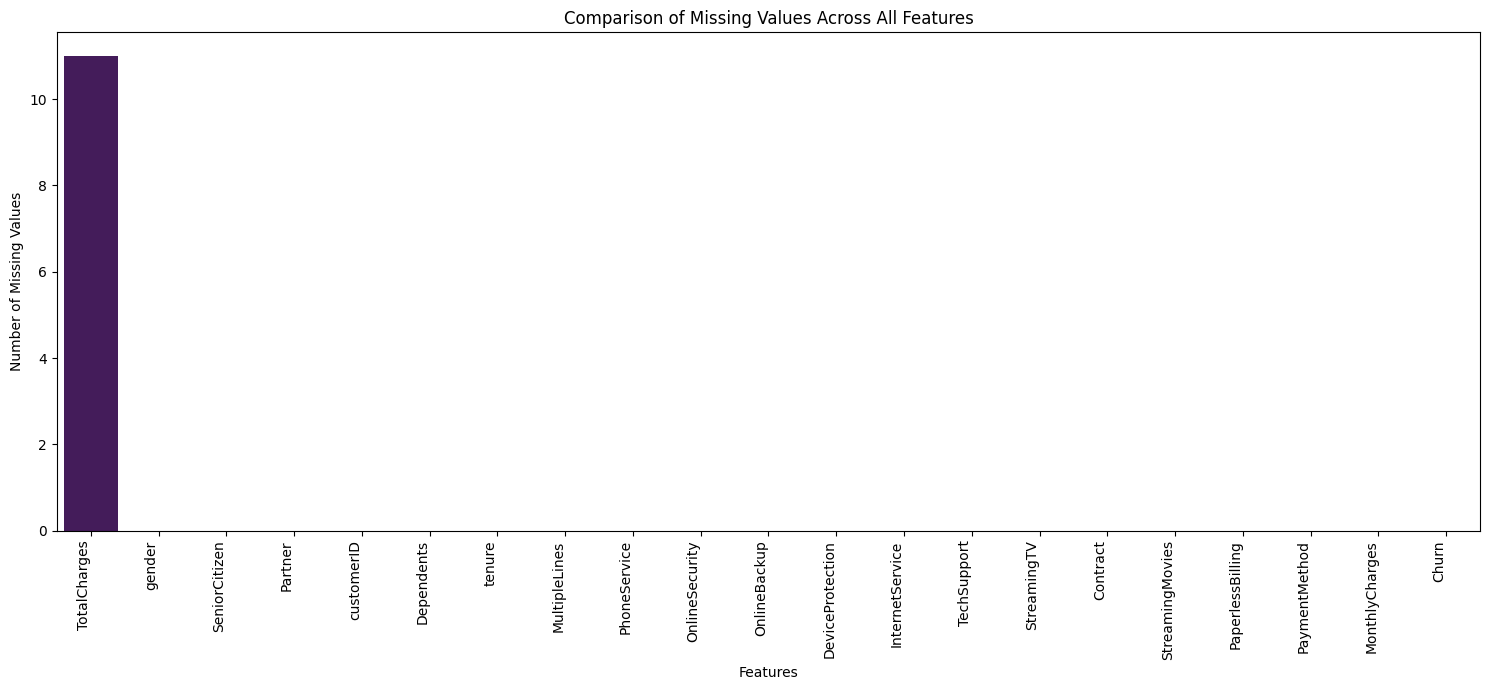

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perbandingan jumlah missing value pada semua kolom
missing_data_to_plot = missing_values_table.sort_values(by='Total Missing', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=missing_data_to_plot.index, y='Total Missing', data=missing_data_to_plot, palette='viridis', hue=missing_data_to_plot.index, legend=False)
plt.title('Comparison of Missing Values Across All Features')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Visualisasi distribusi target

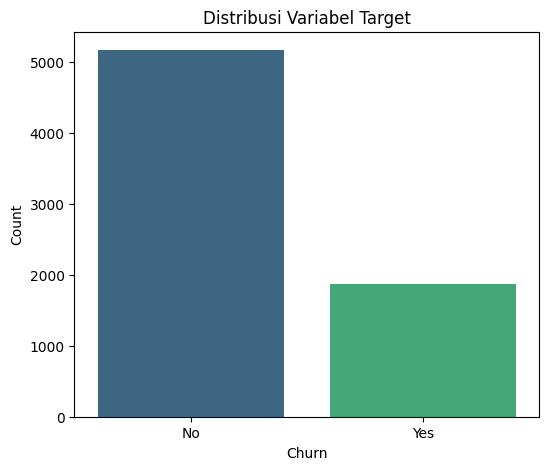

In [10]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Churn', palette='viridis', hue='Churn', legend=False)
plt.title('Distribusi Variabel Target')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Analisis Korelasi

In [11]:
# Pilih data numerik untuk korelasi
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

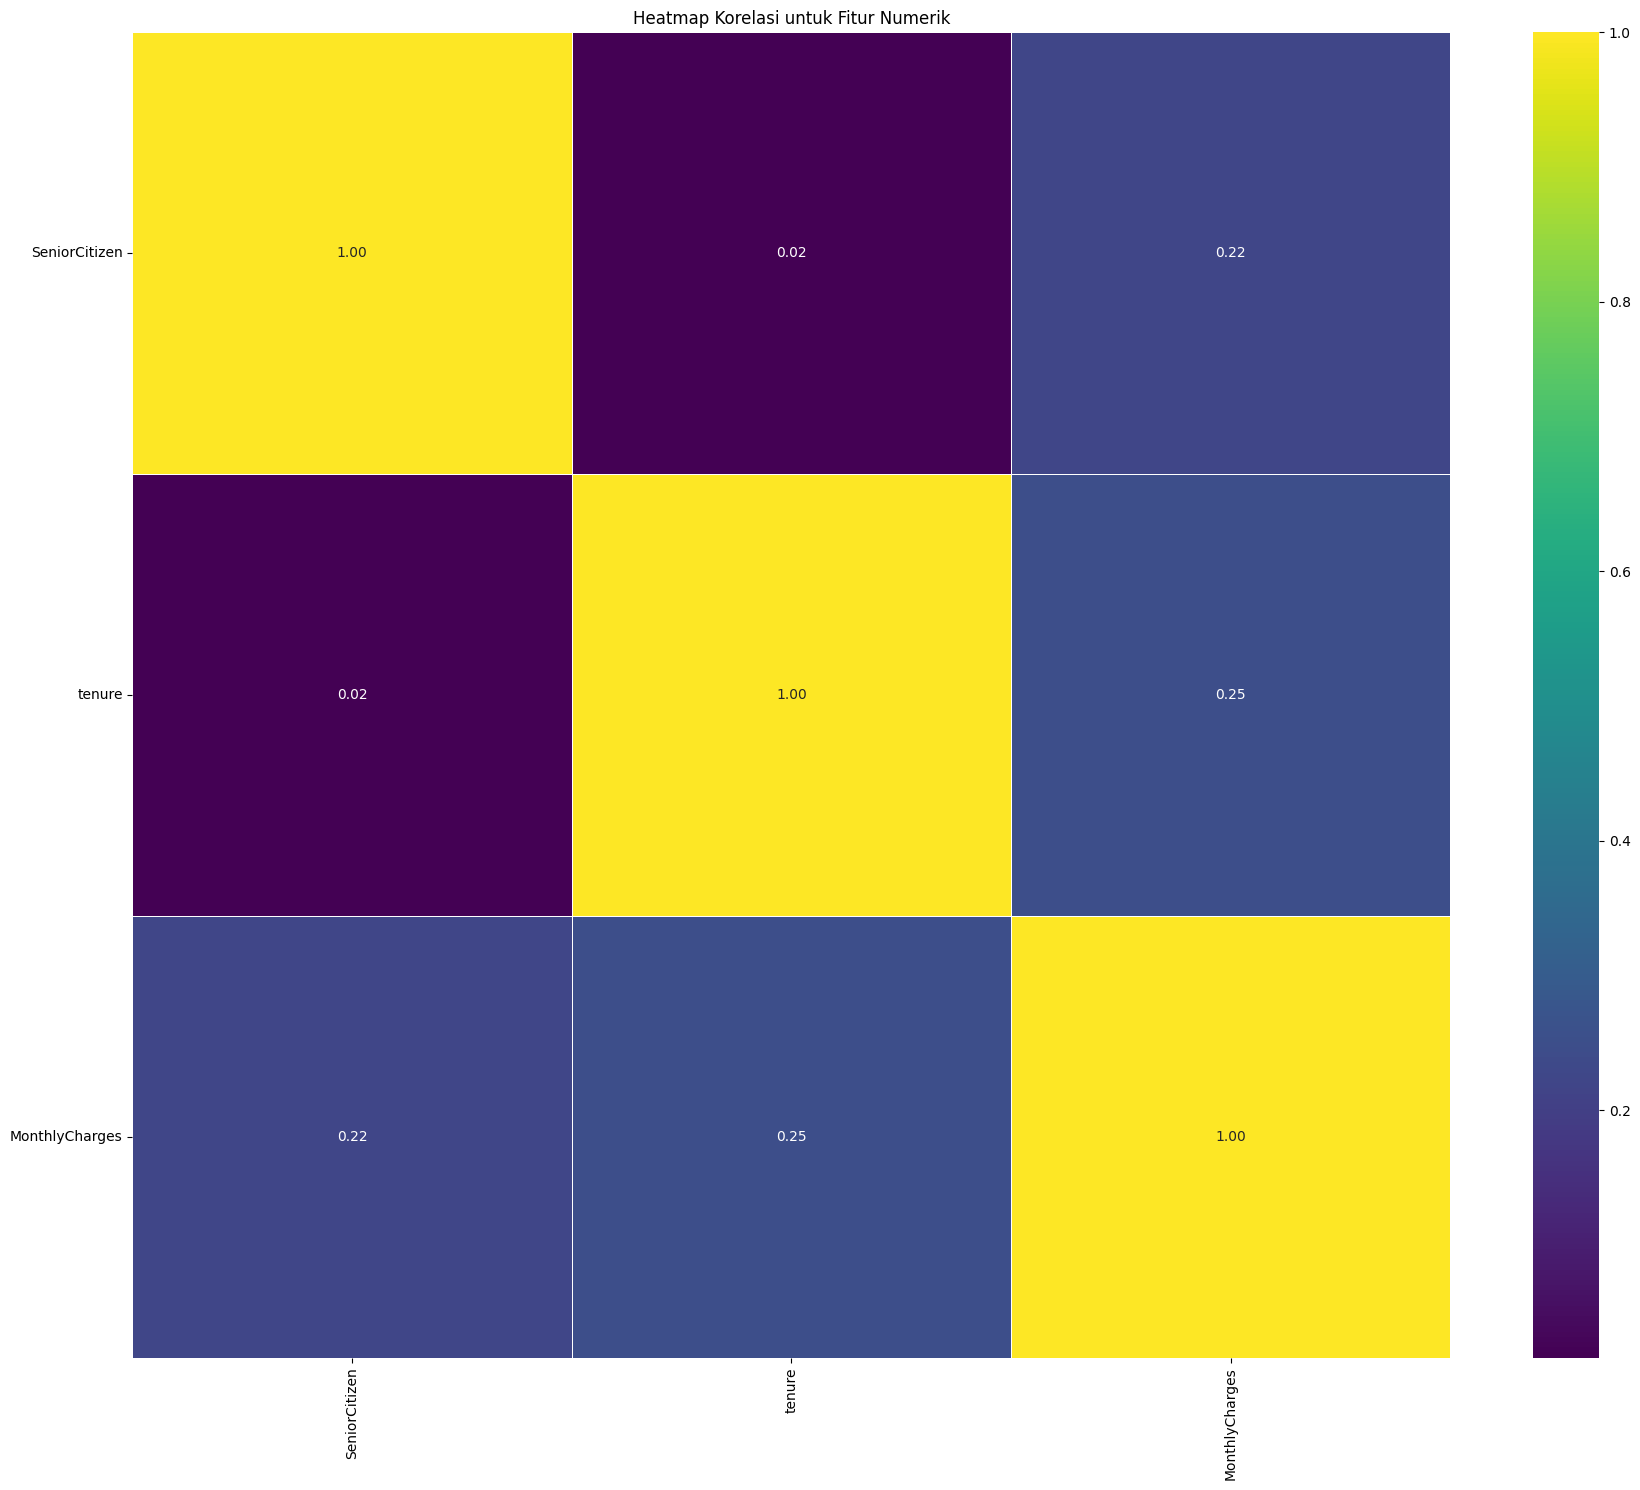

In [12]:
# Visualisasi heatmap korelasi antar fitur numerik
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi untuk Fitur Numerik')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Identifikasi Korelasi Heatmap**<br>
Pada heatmap tersebut, menandakan korelasi positif pada warna yang semakin gelap. Nilai variabel akan berpengaruh pada nilai variabel lainnya. Pada warna yang semakin terang menandakan korelasi negatif, yang berarti nilai salah satu variabel dapat berbanding terbalik.

# **DIRECT MODELING**

## Menetapkan variabel target dan fitur prediktor

Variabel churn perlu dilakukan encoding karena tidak bisa dilakukan dibuat pemodelan

In [13]:
# Encode 'Churn' to 1 (Yes) and 0 (No)
# Correcting the mapping to match actual values 'Yes' and 'No'
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Menetapkan variabel target (y)
y = data['Churn']

# Menetapkan fitur prediktor (X) - dropping only 'Churn' here as per instruction
X = data.drop(columns=['Churn'])

print("Fitur Prediktor (X) setelah Churn diencode (perhatikan tipe data):")
display(X.head())
print("Variabel Target (y) setelah diencode:")
display(y.head())
print("Info Tipe Data X:")
X.info()

Fitur Prediktor (X) setelah Churn diencode (perhatikan tipe data):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Variabel Target (y) setelah diencode:


,Churn
0,0
1,0
2,1
3,0
4,1


Info Tipe Data X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

Dilakukan pengambilan fitur numerik saja

In [14]:
# Re-import dataset to ensure a clean state
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Apply initial cleaning for missing values (from ' ', '-', '' to NaN)
data.replace({' ': np.nan, '-': np.nan, '': np.nan}, inplace=True)
print("Dataset reloaded and initial missing values handled.")

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Drop rows with NaN in 'TotalCharges' as requested
data.dropna(subset=['TotalCharges'], inplace=True)
print("'TotalCharges' converted to numeric and rows with missing values dropped.")

# Encode 'Churn' to 1 (Yes) and 0 (No)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Set target (y)
y = data['Churn']

# Select only numerical columns for X (predictor features)
X = data.select_dtypes(include=['int64', 'float64'])

# Ensure 'Churn' is not in X, as it's our target variable (already assigned to y)
if 'Churn' in X.columns:
    X = X.drop(columns=['Churn'])

print("\nFirst 5 rows of X (numerical features only):")
display(X.head())
print("\nVariabel Target (y) setelah diencode:")
display(y.head())
print("\nInfo Tipe Data X (numerical features only):")
X.info()
print("\nUnique values in Churn column after encoding:")
print(y.unique())
print("\nNumber of missing values in X after selection:")
print(X.isnull().sum())

Dataset reloaded and initial missing values handled.
'TotalCharges' converted to numeric and rows with missing values dropped.

First 5 rows of X (numerical features only):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65



Variabel Target (y) setelah diencode:


,Churn
0,0
1,0
2,1
3,0
4,1



Info Tipe Data X (numerical features only):
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   tenure          7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB

Unique values in Churn column after encoding:
[0 1]

Number of missing values in X after selection:
SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


## Train-test split tanpa preprocessing dan hyperparameter tuning

Train-test split menjadi data latih dan data uji. Memilih data yang numerik saja untuk diuji dengan target churn

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data latih X_train: {X_train.shape}")
print(f"Data uji X_test: {X_test.shape}")
print(f"Variabel target latih y_train: {y_train.shape}")
print(f"Variabel target uji y_test: {y_test.shape}")

Data latih X_train: (5625, 4)
Data uji X_test: (1407, 4)
Variabel target latih y_train: (5625,)
Variabel target uji y_test: (1407,)


## Pelatihan model

Pemodelan yang akan dilakukan
*   Konvensional (KNN)
*   Ensemble Bagging (Random Forest)
*   Ensemble Voting (Model gabungan)

Evaluasi Model Klasifikasi KNN: 
Akurasi: 0.775408670931059
Precision: 0.7606492117781251
Recall: 0.775408670931059
F1 Score: 0.7635634183089145
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.45      0.51       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407


Confusion Matrix:


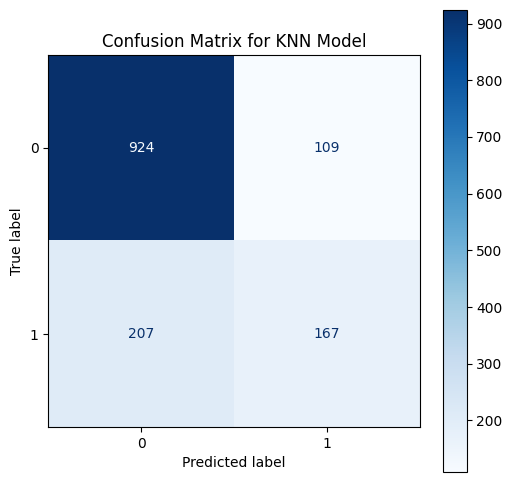

In [16]:
# Model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Lakukan prediksi pada data uji
knn_model.fit(X_train, y_train)

# Lakukan pelatihan data
y_pred_knn = knn_model.predict(X_test)

# Hasil pemodelan KNN
print("Evaluasi Model Klasifikasi KNN: ")
print('Akurasi:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_knn, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

# Confusion Matrix
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for KNN Model')
plt.show()

Evaluasi Model Klasifikasi Random Forest : 
Akurasi: 0.759772565742715
Precision: 0.7452016636168364
Recall: 0.759772565742715
F1 Score: 0.7495691365031814
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.44      0.49       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407


Confusion Matrix:


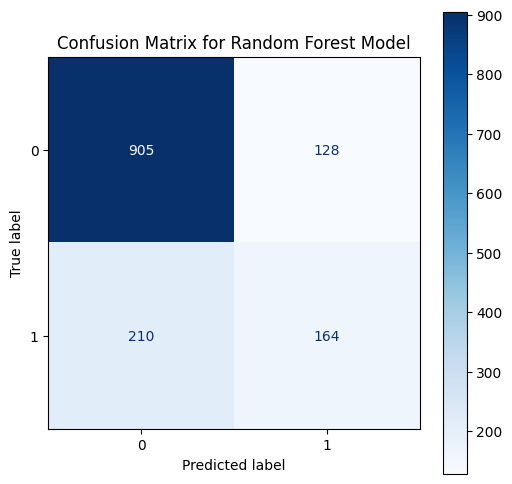

In [17]:
# Model Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Lakukan pelatihan model
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Hasil pemodelan Random Forest
print("Evaluasi Model Klasifikasi Random Forest : ")
print('Akurasi:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [18]:
# Model ensemble voting
# Gabungan model logistic regression, KNN, random forest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inisialisasi model ensemble voting
lr_model = LogisticRegression(random_state=42, solver='liblinear')
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)

# Membuat VotingClassifier untuk mengumpulkan prediksi dari semua model
# Kemudian, dipilih dari suara voting mayoritas
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('knn', knn_model),
        ('rf', rf_model)
    ],
    voting='soft', # Probabilitas rata-rata
    weights=[1, 1, 1],
    n_jobs=-1,
    verbose=True
)

# Lakukan proses training model
print("\nTraining Ensemble Voting Classifier")
ensemble_model.fit(X_train, y_train)

# Lakukan prediksi
y_pred_ensemble = ensemble_model.predict(X_test)

# Hasil pemodelan ensemble voting
print("Evaluasi Model Klasifikasi Ensemble Voting : ")
print('Akurasi:', accuracy_score(y_test, y_pred_ensemble))
print('Precision:', precision_score(y_test, y_pred_ensemble, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_ensemble, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_ensemble, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_ensemble))


Training Ensemble Voting Classifier
Evaluasi Model Klasifikasi Ensemble Voting : 
Akurasi: 0.7796730632551528
Precision: 0.7639598531260204
Recall: 0.7796730632551528
F1 Score: 0.7653097225059261
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.77      1407




Confusion Matrix:


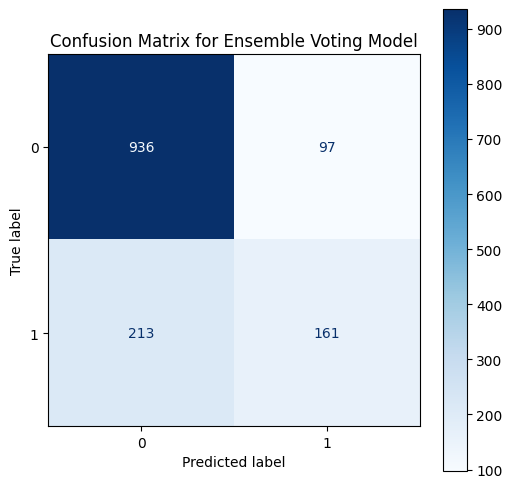

In [19]:
# Confusion Matrix Ensemble Voting
from sklearn.metrics import ConfusionMatrixDisplay
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Ensemble Voting Model')
plt.show()

# **MODELING DENGAN PREPROCESSING**

## Preprocessing data

### Penanganan missing value

In [20]:
# Input original data
from sklearn.impute import SimpleImputer
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Apply initial cleaning to convert ' ', '-', and empty strings to NaN
data.replace({' ': np.nan, '-': np.nan, '': np.nan}, inplace=True)
print("Dataset reloaded and initial string-to-NaN conversions handled.")

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("'TotalCharges' converted to numeric. Checking for missing values:")
print(data.isnull().sum())

# Impute missing values in 'TotalCharges' (mean imputation)
imputer = SimpleImputer(strategy='mean')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])
print("Missing values in 'TotalCharges' imputed with mean.")
print(data.isnull().sum())

Dataset reloaded and initial string-to-NaN conversions handled.
'TotalCharges' converted to numeric. Checking for missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Missing values in 'TotalCharges' imputed with mean.
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovie

### Encoding untuk fitur kategorikal

LABEL ENCODING UNTUK KATEGORIKAL DENGAN MENGGUNAKAN VALUE NUMERIK (0,1,2,3,..). KARENA TERDAPAT UNIQUE VALUES LEBIH DARI 2<br>
<br>
ONE-HOT ENCODING UNTUK TARGET CHURN DENGAN 0 = NO DAN 1 = YES

Cek nilai unik tiap fitur

In [21]:
# Cek nilai unik tiap fitur
print("Unique values for each feature:")
for column in data.columns:
    print(f"\n--- Feature: {column} ---")
    if data[column].dtype == 'object' or data[column].nunique() < 20: # Display unique values for object types or columns with less than 20 unique values
        print(data[column].unique())
    else: # For columns with many unique values, just print the count and an example
        print(f"Number of unique values: {data[column].nunique()}")
        print(f"Example unique values: {data[column].unique()[:5]}") # Display first 5 unique values
    print(f"Count of unique values: {data[column].nunique()}")

Unique values for each feature:

--- Feature: customerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Count of unique values: 7043

--- Feature: gender ---
['Female' 'Male']
Count of unique values: 2

--- Feature: SeniorCitizen ---
[0 1]
Count of unique values: 2

--- Feature: Partner ---
['Yes' 'No']
Count of unique values: 2

--- Feature: Dependents ---
['No' 'Yes']
Count of unique values: 2

--- Feature: tenure ---
Number of unique values: 73
Example unique values: [ 1 34  2 45  8]
Count of unique values: 73

--- Feature: PhoneService ---
['No' 'Yes']
Count of unique values: 2

--- Feature: MultipleLines ---
['No phone service' 'No' 'Yes']
Count of unique values: 3

--- Feature: InternetService ---
['DSL' 'Fiber optic' 'No']
Count of unique values: 3

--- Feature: OnlineSecurity ---
['No' 'Yes' 'No internet service']
Count of unique values: 3

--- Feature: OnlineBackup ---
['Yes' 'No' 'No internet service']
Count of unique values: 3

--- F

Untuk fitur dan target yang memiliki unique value 2, maka akan dilakukan one hot encoding dengan No bernilai 0 dan Yes bernilai 1. Untuk fitur yang memiliki unique value bernilai 3, maka akan dilakukan label encoding. Dengan rentang nilai 0,1,2,....

In [22]:
# One hot encoding (OHE) and label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Reload the dataset to ensure original string values for encoding in this block
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Apply initial cleaning to convert ' ', '-', and empty strings to NaN
data.replace({' ': np.nan, '-': np.nan, '': np.nan}, inplace=True)
print("Dataset reloaded and initial string-to-NaN conversions handled.")

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' (mean imputation)
imputer = SimpleImputer(strategy='mean')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])
print("Missing values in 'TotalCharges' imputed with mean.")

# Identify binary categorical columns (object type with 2 unique values)
binary_cols_to_map = []
for col in data.select_dtypes(include='object').columns:
    if data[col].nunique() == 2:
        binary_cols_to_map.append(col)

# Exclude 'customerID' if it mistakenly appears (it shouldn't given its high unique count)
if 'customerID' in binary_cols_to_map:
    binary_cols_to_map.remove('customerID')

# Ensure 'Churn' is in binary_cols_to_map for explicit mapping if it's still an object type
if 'Churn' not in binary_cols_to_map and data['Churn'].dtype == 'object' and data['Churn'].nunique() == 2:
    binary_cols_to_map.append('Churn')

print(f"\nBinary categorical columns for 0/1 mapping: {binary_cols_to_map}")

# Apply explicit 0/1 mapping for 'No' and 'Yes' values, and for 'gender'
for col in binary_cols_to_map:
    if col == 'gender':
        # Map 'Female' to 0 and 'Male' to 1 as a standard convention
        data[col] = data[col].map({'Female': 0, 'Male': 1})
    else:
        # For 'Yes'/'No' columns, map 'No' to 0 and 'Yes' to 1
        data[col] = data[col].map({'No': 0, 'Yes': 1})
    print(f"  - Column '{col}' mapped to 0/1.")

# Identify remaining categorical columns (object type with >2 unique values) for Label Encoding
categorical_cols_for_label_encoding = [
    col for col in data.select_dtypes(include='object').columns
    if col not in binary_cols_to_map and col != 'customerID'
]

print(f"\nCategorical columns for Label Encoding: {categorical_cols_for_label_encoding}")

# Apply Label Encoding to multi-class categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols_for_label_encoding:
    data[col] = label_encoder.fit_transform(data[col])
    print(f"  - Column '{col}' encoded with {len(label_encoder.classes_)} unique values.")

# Drop 'customerID' as it's an identifier and not a feature
data = data.drop(columns=['customerID'])
print("\n'customerID' column dropped.")

print("\nFirst 5 rows of the DataFrame after encoding:")
display(data.head())

Dataset reloaded and initial string-to-NaN conversions handled.
Missing values in 'TotalCharges' imputed with mean.

Binary categorical columns for 0/1 mapping: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
  - Column 'gender' mapped to 0/1.
  - Column 'Partner' mapped to 0/1.
  - Column 'Dependents' mapped to 0/1.
  - Column 'PhoneService' mapped to 0/1.
  - Column 'PaperlessBilling' mapped to 0/1.
  - Column 'Churn' mapped to 0/1.

Categorical columns for Label Encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
  - Column 'MultipleLines' encoded with 3 unique values.
  - Column 'InternetService' encoded with 3 unique values.
  - Column 'OnlineSecurity' encoded with 3 unique values.
  - Column 'OnlineBackup' encoded with 3 unique values.
  - Column 'DeviceProtection' encoded with 3 unique values.
  - Column 'TechSupport' enc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Cek outlier

In [23]:
# Check outlier
y = data['Churn']
X = data.drop(columns=['Churn'])

print("\n--- Data for Outlier Check ---")
print("Features (X) head:")
display(X.head())
print("\nTarget variable (y) head:")
display(y.head())

# Combine X and y into a single DataFrame to check outliers for all relevant columns
combined_data_for_outliers = pd.concat([X.reset_index(drop=True), y.rename('Churn').reset_index(drop=True)], axis=1)

# Select only numerical columns for outlier check (all columns in combined_data_for_outliers should now be numerical)
numerical_cols_for_outliers = combined_data_for_outliers.select_dtypes(include=np.number).columns


--- Data for Outlier Check ---
Features (X) head:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65



Target variable (y) head:


,Churn
0,0
1,0
2,1
3,0
4,1


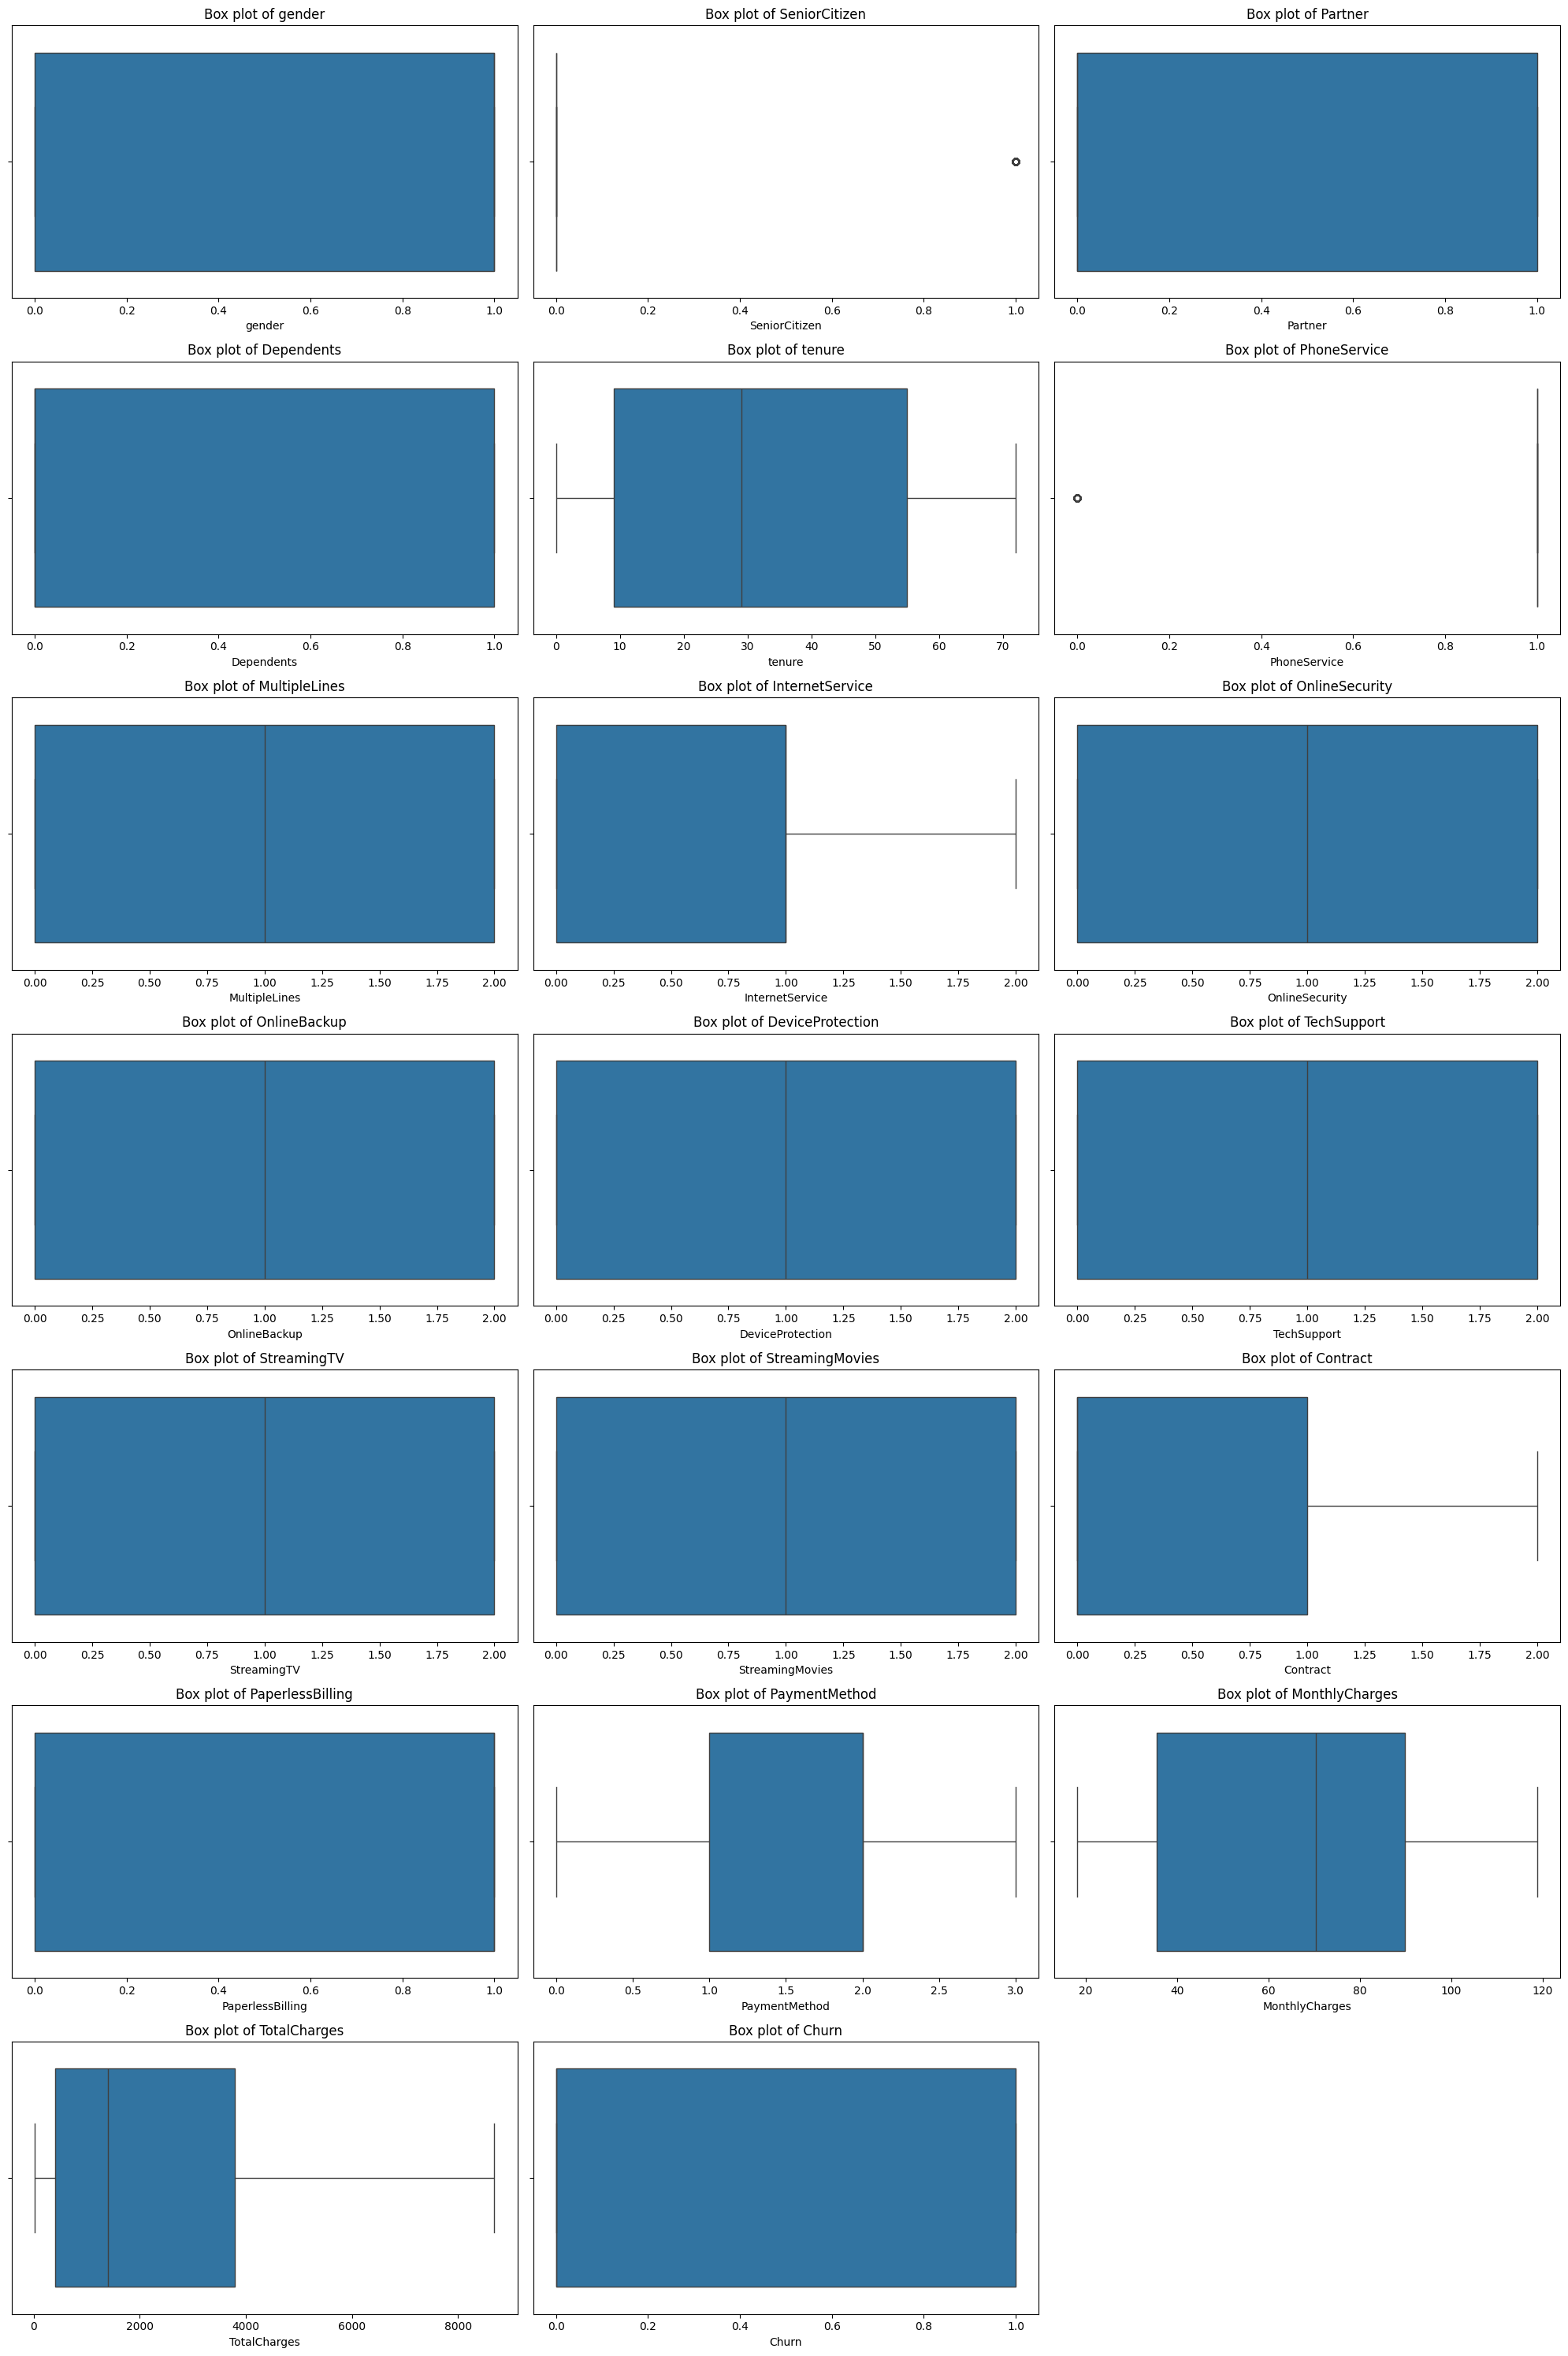

In [24]:
# Visualisasi box plot untuk outlier
plt.figure(figsize=(20, 5 * (len(numerical_cols_for_outliers) // 4 + 1)))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(len(numerical_cols_for_outliers) // 3 + 1, 3, i + 1)
    sns.boxplot(x=combined_data_for_outliers[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [25]:
# Cek duplikasi data
print(f"Jumlah duplikasi data: {data.duplicated().sum()}")

Jumlah duplikasi data: 22


In [26]:
# Mengatasi duplikasi data
data.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi data setelah dihapus: {data.duplicated().sum()}")

Jumlah duplikasi data setelah dihapus: 0


### Scaling fitur

Melakukan teknik normalisasi data dengan menghitung standar deviasi antara 0 dan 1

In [27]:
from sklearn.preprocessing import StandardScaler

# Lakukan scaling untuk 3 fitur
features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

saler = StandardScaler()

X_train[features_to_scale] = saler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = saler.transform(X_test[features_to_scale])

print("X_train head after scaling:")
display(X_train.head())
print("X_test head after scaling:")
display(X_test.head())

X_train head after scaling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6030,0,0.434674,-0.518620,-0.087908
3410,0,-1.195652,-0.374443,-0.921285
5483,0,0.923772,0.432616,0.963781
5524,0,0.516190,-0.333013,0.122920
6337,0,0.923772,1.199902,1.401088


X_test head after scaling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2481,1,1.168321,-1.315736,-0.341541
6784,0,-0.543522,-1.325680,-0.798916
6125,0,-0.788071,1.244647,-0.404569
3052,0,0.190125,-0.319756,-0.107975
4099,0,-1.073378,-1.168245,-0.933316


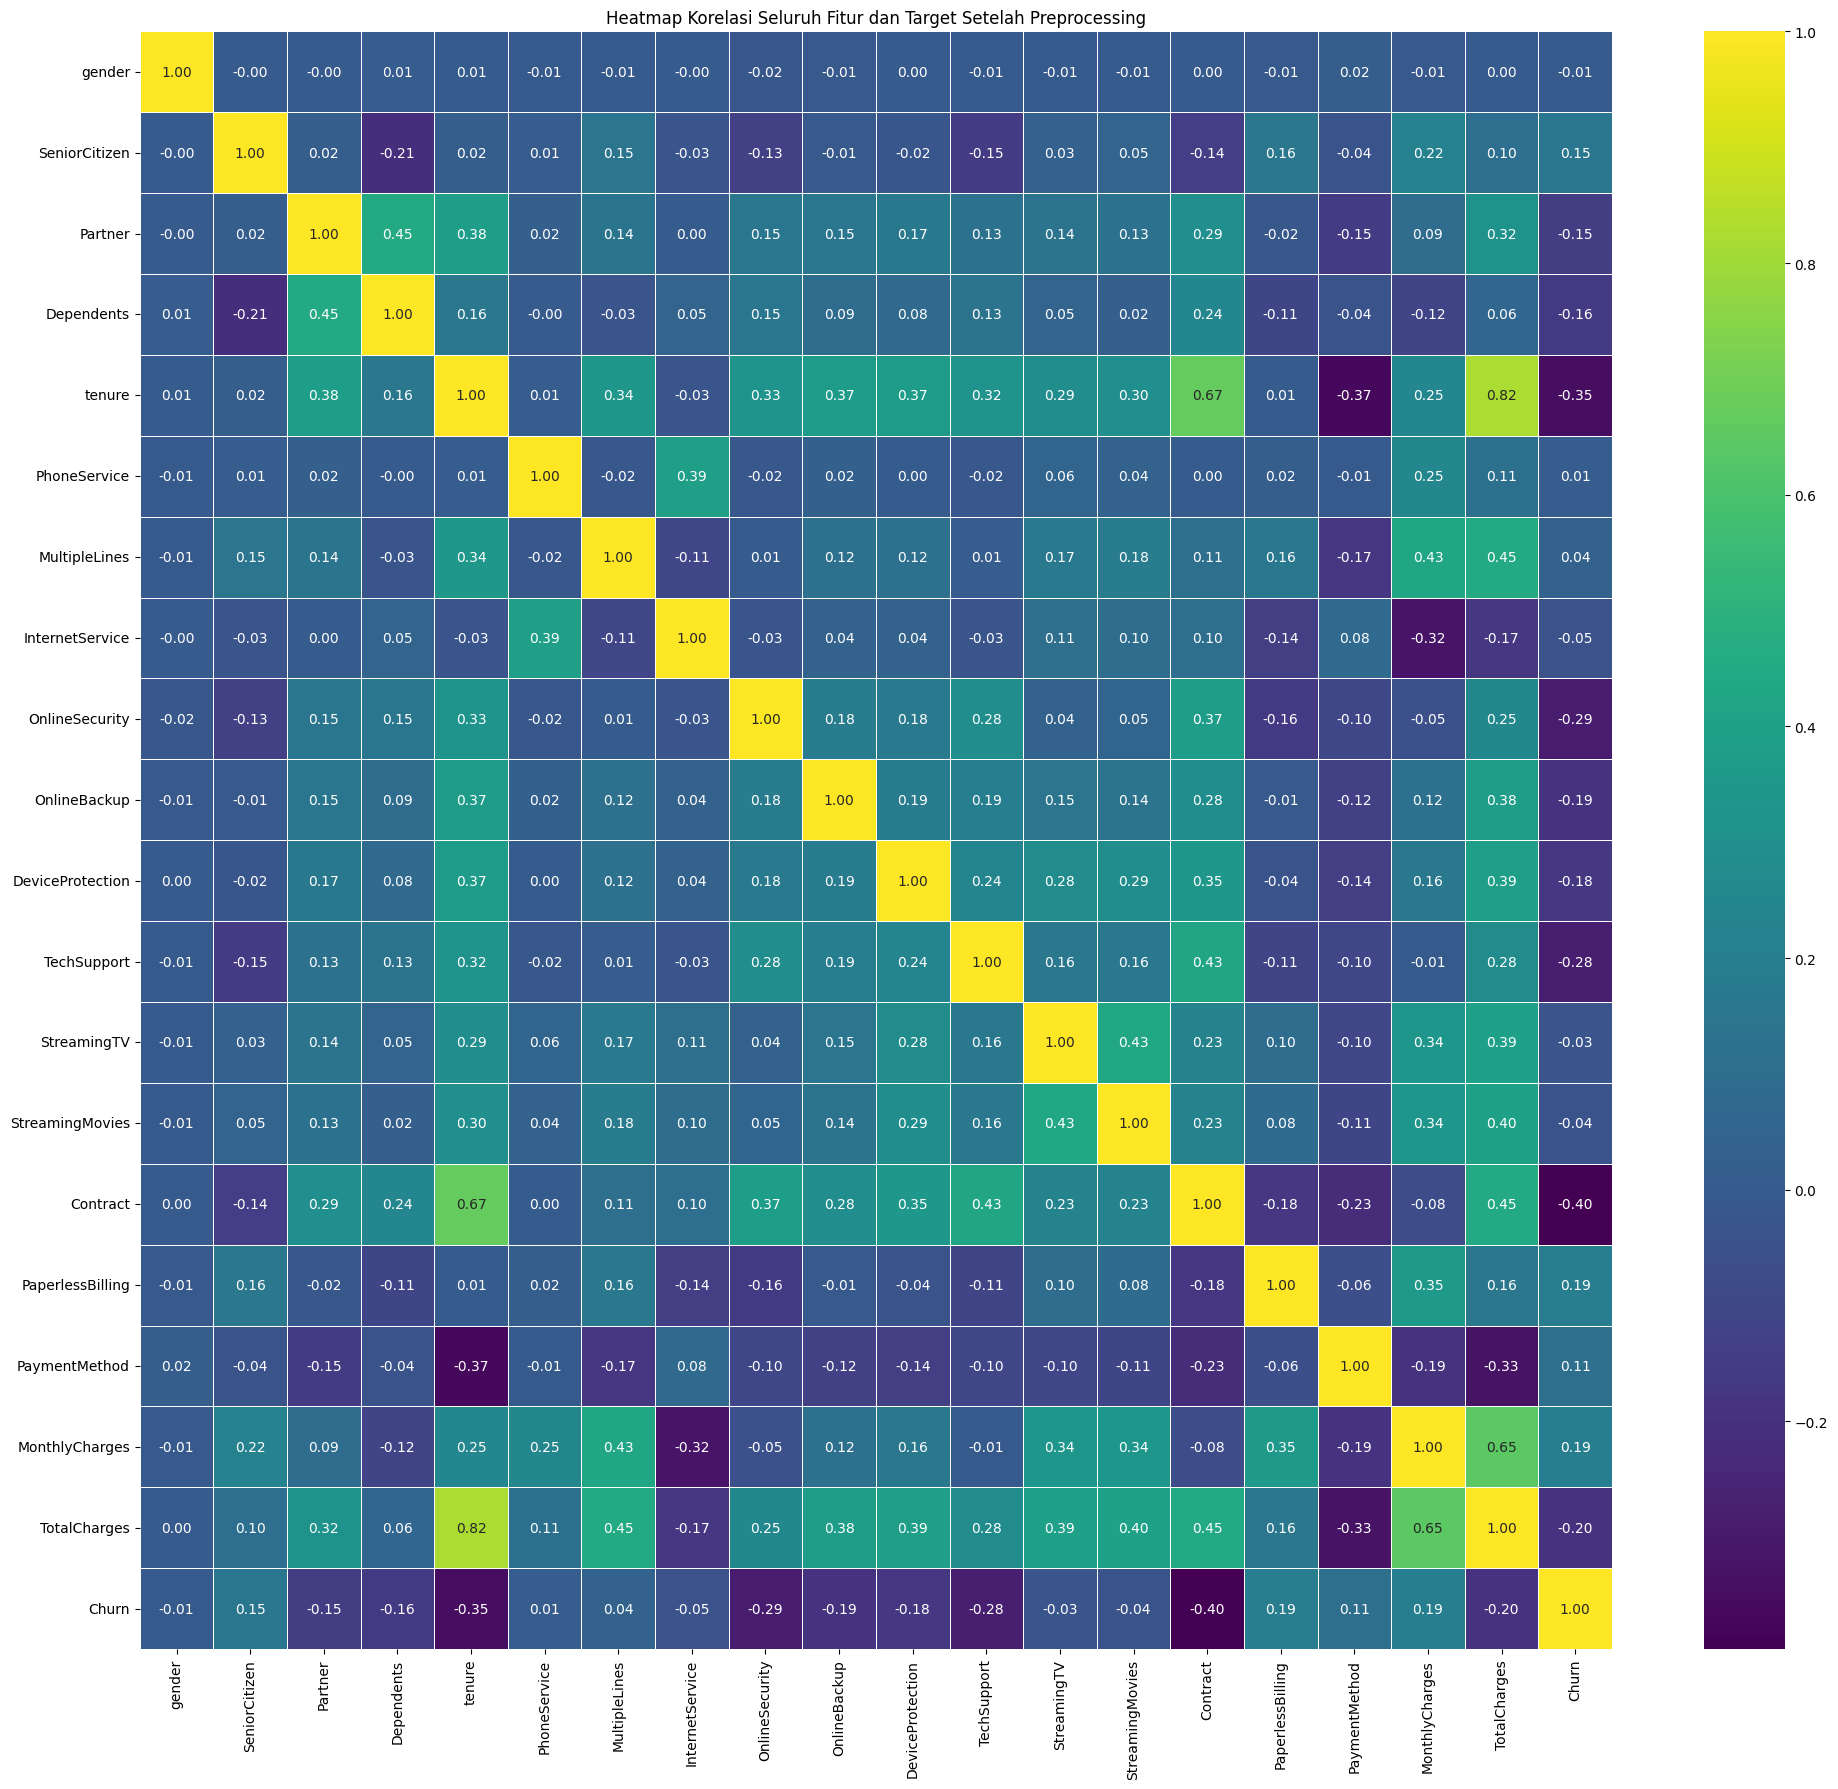

In [28]:
columns_for_correlation = data

# Calculate the correlation matrix for all features and the target
correlation_matrix_full = columns_for_correlation.corr()

# Visualisasi heatmap korelasi antar fitur dan target
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_full, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Seluruh Fitur dan Target Setelah Preprocessing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Menetapkan kembali fitur X dan Y

In [29]:
# Penetapan kembali fitur prediksi (X) dan variabel target (Y) setelah preprocessing
y = data['Churn']
X = data.drop(columns=['Churn'])

print("Features (X) after preprocessing:")
display(X.head())

print("\nTarget variable (y) after preprocessing:")
display(y.head())

Features (X) after preprocessing:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65



Target variable (y) after preprocessing:


,Churn
0,0
1,0
2,1
3,0
4,1


## Train-test split setelah preprocessing

In [30]:
# Train-test split setelah preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data latih X_train: {X_train.shape}")
print(f"Data uji X_test: {X_test.shape}")
print(f"Variabel target latih y_train: {y_train.shape}")
print(f"Variabel target uji y_test: {y_test.shape}")

Data latih X_train: (5616, 19)
Data uji X_test: (1405, 19)
Variabel target latih y_train: (5616,)
Variabel target uji y_test: (1405,)


## Pelatihan model

Pemodelan setelah preprocessing akan dilakukan untuk tiga model dibawah ini :
*   Konvensional (KNN)
*   Ensemble Bagging (Random Forest)
*   Ensemble Voting (Model gabungan)

Evaluasi Model Klasifikasi KNN (Setelah Preprocessing): 
Akurasi: 0.7686832740213523
Precision: 0.7579714865579682
Recall: 0.7686832740213523
F1 Score: 0.7621063833692406
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1053
           1       0.55      0.46      0.50       352

    accuracy                           0.77      1405
   macro avg       0.69      0.67      0.68      1405
weighted avg       0.76      0.77      0.76      1405


Confusion Matrix:


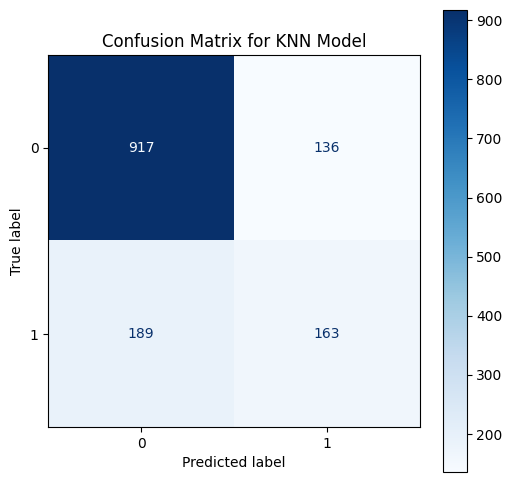

In [32]:
# Model KNN setelah preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Lakukan prediksi pada data uji
knn_model.fit(X_train, y_train)

# Lakukan pelatihan data
y_pred_knn_prep = knn_model.predict(X_test)

# Hasil pemodelan KNN
print("Evaluasi Model Klasifikasi KNN (Setelah Preprocessing): ")
print('Akurasi:', accuracy_score(y_test, y_pred_knn_prep))
print('Precision:', precision_score(y_test, y_pred_knn_prep, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_knn_prep, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_knn_prep, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_knn_prep))

# Confusion Matrix
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_prep, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for KNN Model')
plt.show()

Evaluasi Model Klasifikasi Random Forest (Setelah Preprocessing) : 
Akurasi: 0.7871886120996441
Precision: 0.7739205889659219
Recall: 0.7871886120996441
F1 Score: 0.7775860947743023
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1053
           1       0.60      0.46      0.52       352

    accuracy                           0.79      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.79      0.78      1405


Confusion Matrix:


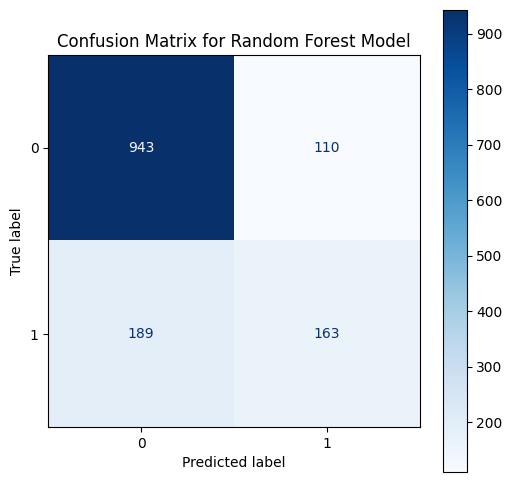

In [33]:
# Model Random Forest setelah preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Lakukan pelatihan model
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rf_prep = rf_model.predict(X_test)

# Hasil pemodelan Random Forest
print("Evaluasi Model Klasifikasi Random Forest (Setelah Preprocessing) : ")
print('Akurasi:', accuracy_score(y_test, y_pred_rf_prep))
print('Precision:', precision_score(y_test, y_pred_rf_prep, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf_prep, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_rf_prep, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_prep))

# Confusion Matrix
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_prep, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [34]:
# Model ensemble voting
# Gabungan model logistic regression, KNN, random forest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inisialisasi model ensemble voting
lr_model = LogisticRegression(random_state=42, solver='liblinear')
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)

# Membuat VotingClassifier untuk mengumpulkan prediksi dari semua model
# Kemudian, dipilih dari suara voting mayoritas
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('knn', knn_model),
        ('rf', rf_model)
    ],
    voting='soft', # Probabilitas rata-rata
    weights=[1, 1, 1],
    n_jobs=-1,
    verbose=True
)

# Lakukan proses training model
print("\nTraining Ensemble Voting Classifier")
ensemble_model.fit(X_train, y_train)

# Lakukan prediksi
y_pred_ensemble_prep = ensemble_model.predict(X_test)

# Hasil pemodelan ensemble voting
print("Evaluasi Model Klasifikasi Ensemble Voting (Setelah preprocessing) : ")
print('Akurasi:', accuracy_score(y_test, y_pred_ensemble_prep))
print('Precision:', precision_score(y_test, y_pred_ensemble_prep, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_ensemble_prep, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_ensemble_prep, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_ensemble_prep))


Training Ensemble Voting Classifier
Evaluasi Model Klasifikasi Ensemble Voting (Setelah preprocessing) : 
Akurasi: 0.7935943060498221
Precision: 0.7804496237299124
Recall: 0.7935943060498221
F1 Score: 0.7835704502101735
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.62      0.47      0.53       352

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405




Confusion Matrix:


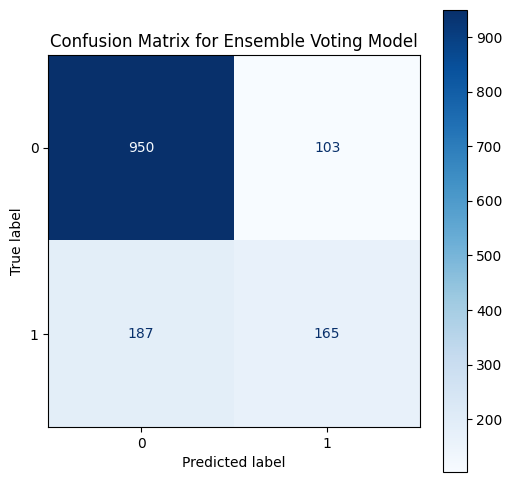

In [35]:
# Confusion Matrix Ensemble Voting
from sklearn.metrics import ConfusionMatrixDisplay
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble_prep, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Ensemble Voting Model')
plt.show()

# **HYPERPARAMETER TUNING**

## Menyusun parameter grid

Parameter grid model KNN

In [36]:
knn_param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

print("KNN Parameter Grid:")
print(knn_param_grid)

KNN Parameter Grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


Parameter grid model random forest

In [37]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

print("Random Forest Parameter Grid:")
print(rf_param_grid)

Random Forest Parameter Grid:
{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}


Parameter grid logistic regression

In [38]:
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

print("Logistic Regression Parameter Grid:")
print(lr_param_grid)

Logistic Regression Parameter Grid:
{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}


Parameter grid SVM

In [39]:
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

print("SVC Parameter Grid:")
print(svc_param_grid)

SVC Parameter Grid:
{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}


## Proses Hyperparameter Tuning

**Create RandomizedSearchCV object**<br>
*   n_iter: Number of parameter settings that are sampled.<br>
*   cv: Number of folds for cross-validation.<br>
*   scoring: Metric to evaluate the model performance.<br>
*   random_state: For reproducibility.<br>
*   n_jobs: Number of jobs to run in parallel. -1 means using all processors.<br>
*   verbose: Controls the verbosity: the higher, the more messages.

Proses hyperparameter tuning KNN dengan RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n--- KNN Hyperparameter Tuning with RandomizedSearchCV ---")

# Initialize KNN model
knn = KNeighborsClassifier()

# Create RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='f1_weighted', # Use f1_weighted as the scoring metric
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit RandomizedSearchCV to the training data
print("\nStarting RandomizedSearchCV for KNN...")
random_search_knn.fit(X_train, y_train)
print("RandomizedSearchCV for KNN completed.")

# Extract and print the best estimator and its parameters
best_knn_estimator = random_search_knn.best_estimator_
best_knn_params = random_search_knn.best_params_

print("\nBest KNN Estimator:", best_knn_estimator)
print("Best KNN Parameters:", best_knn_params)

# Make predictions on the test set using the best estimator
y_pred_knn_tuned = best_knn_estimator.predict(X_test)


--- KNN Hyperparameter Tuning with RandomizedSearchCV ---

Starting RandomizedSearchCV for KNN...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV for KNN completed.

Best KNN Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')
Best KNN Parameters: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}



--- Evaluation of Tuned KNN Model ---
Akurasi: 0.7772241992882563
Precision (weighted): 0.7644131005451554
Recall (weighted): 0.7772241992882563
F1 Score (weighted): 0.7686543172777105
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1053
           1       0.57      0.46      0.51       352

    accuracy                           0.78      1405
   macro avg       0.70      0.67      0.68      1405
weighted avg       0.76      0.78      0.77      1405


Confusion Matrix:


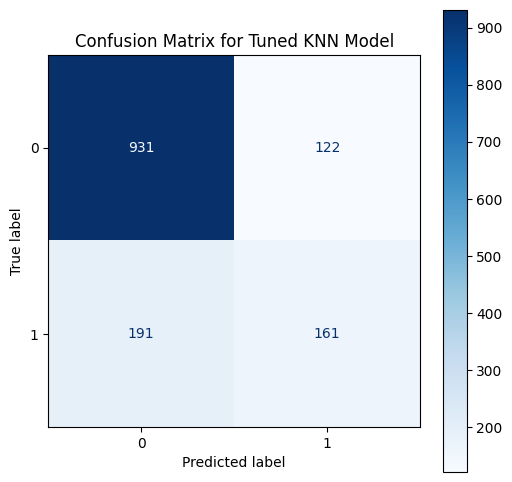

In [41]:
# Evaluate the performance of the tuned KNN model
print("\n--- Evaluation of Tuned KNN Model ---")
print('Akurasi:', accuracy_score(y_test, y_pred_knn_tuned))
print('Precision (weighted):', precision_score(y_test, y_pred_knn_tuned, average='weighted'))
print('Recall (weighted):', recall_score(y_test, y_pred_knn_tuned, average='weighted'))
print('F1 Score (weighted):', f1_score(y_test, y_pred_knn_tuned, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_knn_tuned))

# Display the confusion matrix for the tuned KNN model
print('\nConfusion Matrix:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_tuned, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned KNN Model')
plt.show()

Proses hyperparameter tuning Random Forest dengan RandomizedSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("--- Starting Random Forest Hyperparameter Tuning ---")

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Konfigurasi RandomizedSearchCV untuk Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,       # Cross-validation folds
    scoring='f1_weighted', # Use f1_weighted for imbalanced classes
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Latih RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Ekstrak best estimator dan best params
best_rf_estimator = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

print("\nBest Estimator for Random Forest:")
print(best_rf_estimator)
print("\nBest Parameters for Random Forest:")
print(best_rf_params)

# Prediksi dengan best estimator Random Forest
y_pred_rf_tuned = best_rf_estimator.predict(X_test)

--- Starting Random Forest Hyperparameter Tuning ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Estimator for Random Forest:
RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

Best Parameters for Random Forest:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}



--- Evaluasi Model Random Forest (Setelah Hyperparameter Tuning) ---
Akurasi: 0.802846975088968
Precision: 0.7926014770021139
Recall: 0.802846975088968
F1 Score: 0.7955180495573275
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1053
           1       0.63      0.51      0.57       352

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.79      0.80      0.80      1405


Confusion Matrix for Tuned Random Forest Model:


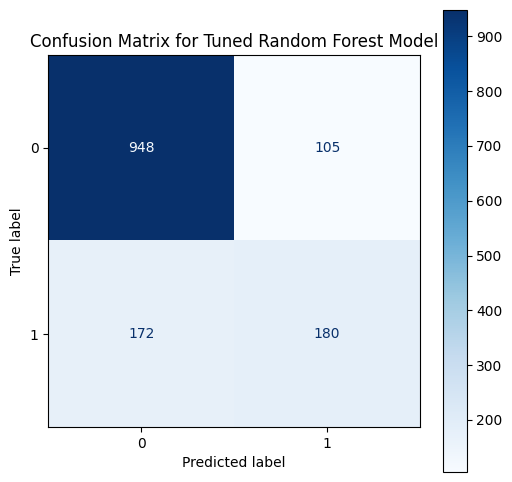

In [43]:
# Evaluasi model Random Forest yang sudah di-tune
print("\n--- Evaluasi Model Random Forest (Setelah Hyperparameter Tuning) ---")
print('Akurasi:', accuracy_score(y_test, y_pred_rf_tuned))
print('Precision:', precision_score(y_test, y_pred_rf_tuned, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf_tuned, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_rf_tuned, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix
print('\nConfusion Matrix for Tuned Random Forest Model:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_tuned, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.show()

Proses hyperparameter tuning Logistic Regression dengan RandomizedSearchCV

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

print("--- Starting Logistic Regression Hyperparameter Tuning ---")

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42) # Set a random_state for reproducibility

# Konfigurasi RandomizedSearchCV untuk Logistic Regression
random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=lr_param_grid,
    n_iter=20,  # Reduced n_iter for potentially faster search, can be increased if needed
    cv=5,       # Cross-validation folds
    scoring='f1_weighted', # Use f1_weighted for imbalanced classes
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Latih RandomizedSearchCV
random_search_lr.fit(X_train, y_train)

# Ekstrak best estimator dan best params
best_lr_estimator = random_search_lr.best_estimator_
best_lr_params = random_search_lr.best_params_

print("\nBest Estimator for Logistic Regression:")
print(best_lr_estimator)
print("\nBest Parameters for Logistic Regression:")
print(best_lr_params)

# Prediksi dengan best estimator Logistic Regression
y_pred_lr_tuned = best_lr_estimator.predict(X_test)

--- Starting Logistic Regression Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Estimator for Logistic Regression:
LogisticRegression(C=10, random_state=42, solver='liblinear')

Best Parameters for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}



--- Evaluasi Model Logistic Regression (Setelah Hyperparameter Tuning) ---
Akurasi: 0.7921708185053381
Precision: 0.7846761534384961
Recall: 0.7921708185053381
F1 Score: 0.7876098994478276
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1053
           1       0.60      0.53      0.56       352

    accuracy                           0.79      1405
   macro avg       0.72      0.70      0.71      1405
weighted avg       0.78      0.79      0.79      1405


Confusion Matrix for Tuned Logistic Regression Model:


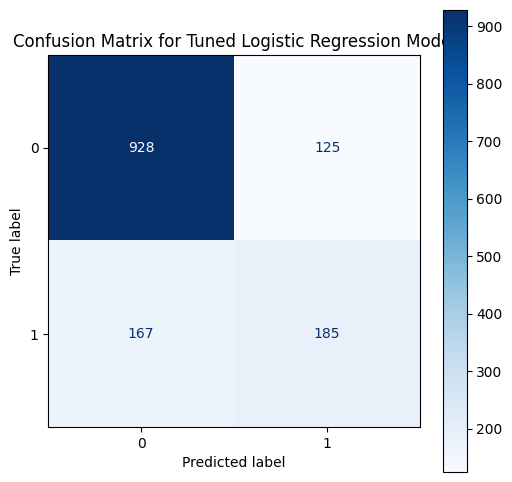

In [45]:
# Evaluasi model Logistic Regression yang sudah di-tune
print("\n--- Evaluasi Model Logistic Regression (Setelah Hyperparameter Tuning) ---")
print('Akurasi:', accuracy_score(y_test, y_pred_lr_tuned))
print('Precision:', precision_score(y_test, y_pred_lr_tuned, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_lr_tuned, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_lr_tuned, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_lr_tuned))

# Confusion Matrix
print('\nConfusion Matrix for Tuned Logistic Regression Model:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_tuned, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.show()

Proses hyperparameter tuning Ensemble Voting dengan gabungan tiga model menggunakan RandomizedSearchCV. <br>
Tiga model tersebut mencakup :


*   Random Forest

*   KNN

*   Logistic Regression


--- Starting Ensemble Voting Classifier Hyperparameter Tuning ---
Generated 23 weight combinations for ensemble tuning.
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Estimator for Ensemble Voting Classifier:
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=13,
                      

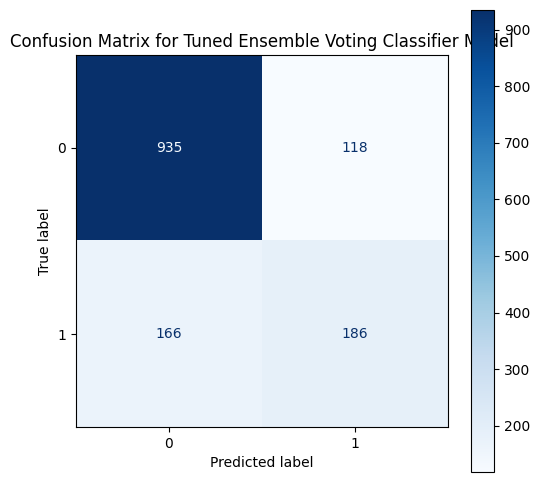

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("--- Starting Ensemble Voting Classifier Hyperparameter Tuning ---")

# Ensure best_lr_estimator, best_svc_estimator, best_rf_estimator are defined from previous steps
# For this step, we will use best_lr_estimator, best_rf_estimator, and best_knn_estimator.

# Inisialisasi VotingClassifier dengan best estimators dari model individual
ensemble_base_model = VotingClassifier(
    estimators=[
        ('lr', best_lr_estimator),
        ('rf', best_rf_estimator),
        ('knn', best_knn_estimator) # Using best_knn_estimator as specified in the subtask
    ],
    voting='soft', # Use 'soft' voting for probability-based decisions
    n_jobs=-1
)

# Define parameter grid for tuning weights of the VotingClassifier
# The weights must sum to 1, so we generate combinations and filter later if necessary
# For RandomizedSearchCV, we can try different combinations directly.
# Let's try some common weight distributions.
ensemble_param_grid = {
    'weights': [[round(w1, 2), round(w2, 2), round(1 - w1 - w2, 2)]
                for w1 in np.arange(0.1, 1.0, 0.2)
                for w2 in np.arange(0.1, 1.0, 0.2)
                if round(w1 + w2, 2) <= 1.0]
}

# Filter out combinations where the third weight is negative or rounds to 0
ensemble_param_grid['weights'] = [w for w in ensemble_param_grid['weights'] if w[2] >= 0]

# Add some specific common weight combinations
ensemble_param_grid['weights'].extend([
    [0.33, 0.33, 0.34], # Approximately equal
    [0.5, 0.3, 0.2],
    [0.2, 0.5, 0.3],
    [0.3, 0.2, 0.5],
    [0.4, 0.3, 0.3],
    [0.3, 0.4, 0.3],
    [0.3, 0.3, 0.4],
    [0.6, 0.2, 0.2],
    [0.2, 0.6, 0.2],
    [0.2, 0.2, 0.6]
])

# Remove duplicates and convert to tuple for set operation, then back to list of lists
ensemble_param_grid['weights'] = list(set(tuple(w) for w in ensemble_param_grid['weights']))
ensemble_param_grid['weights'] = [list(w) for w in ensemble_param_grid['weights']]

print(f"Generated {len(ensemble_param_grid['weights'])} weight combinations for ensemble tuning.")

random_search_ensemble = RandomizedSearchCV(
    estimator=ensemble_base_model,
    param_distributions=ensemble_param_grid,
    n_iter=min(20, len(ensemble_param_grid['weights'])), # Sample up to 20 combinations or all if less
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Latih RandomizedSearchCV
random_search_ensemble.fit(X_train, y_train)

# Ekstrak best estimator dan best params
best_ensemble_estimator = random_search_ensemble.best_estimator_
best_ensemble_params = random_search_ensemble.best_params_

print("\nBest Estimator for Ensemble Voting Classifier:")
print(best_ensemble_estimator)
print("\nBest Parameters for Ensemble Voting Classifier:")
print(best_ensemble_params)

# Prediksi dengan best estimator Ensemble Voting Classifier
y_pred_ensemble_tuned = best_ensemble_estimator.predict(X_test)

# Evaluasi model Ensemble Voting Classifier yang sudah di-tune
print("\n--- Evaluasi Model Ensemble Voting Classifier (Setelah Hyperparameter Tuning) ---")
print('Akurasi:', accuracy_score(y_test, y_pred_ensemble_tuned))
print('Precision:', precision_score(y_test, y_pred_ensemble_tuned, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_ensemble_tuned, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_ensemble_tuned, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred_ensemble_tuned))

# Confusion Matrix
print('\nConfusion Matrix for Tuned Ensemble Voting Classifier Model:')
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble_tuned, cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned Ensemble Voting Classifier Model')
plt.show()

Perbandingan hasil akurasi model KNN, Random Forest, dan Ensemble Voting

Comparison of Model Accuracies Across Stages:


,Model,Accuracy
0,KNN (Direct),0.770107
1,Random Forest (Direct),0.777224
2,Ensemble Voting (Direct),0.787900
3,KNN (Preprocessed),0.768683
4,Random Forest (Preprocessed),0.787189
5,Ensemble Voting (Preprocessed),0.793594
6,KNN (Tuned),0.777224
7,Random Forest (Tuned),0.802847
8,Ensemble Voting (Tuned),0.797865


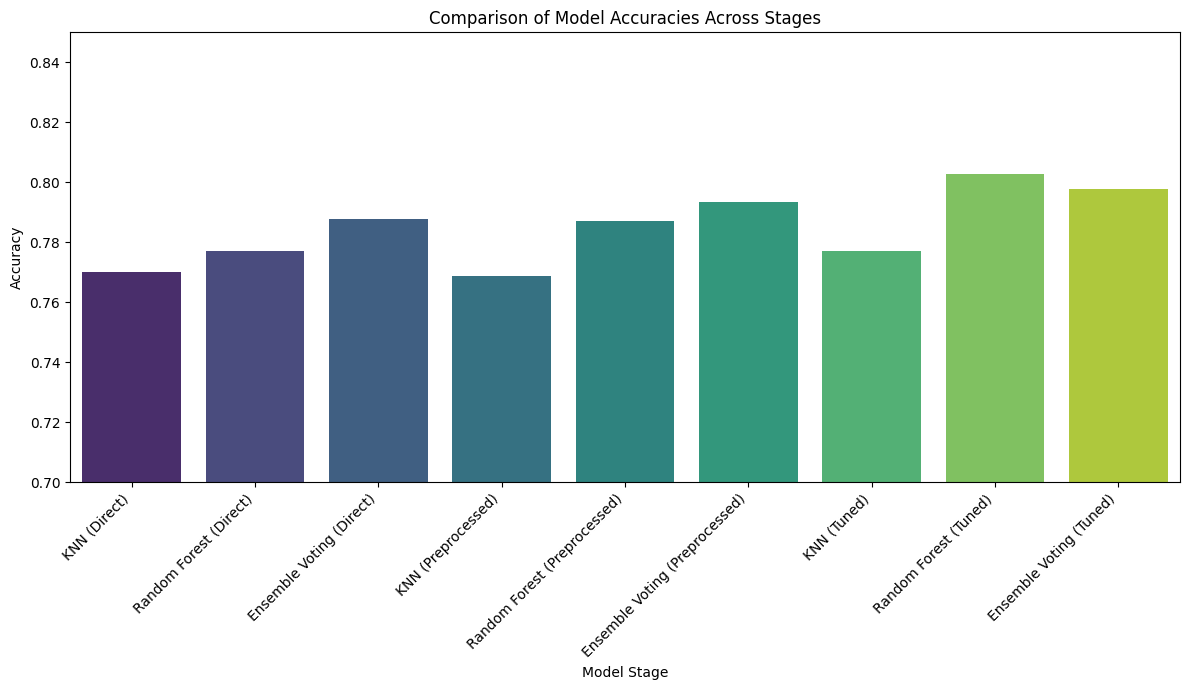

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------------------
# 1. Re-run predictions for 'Direct Models' (trained on 4 numerical features)
#    using the current X_train/X_test
# ----------------------------------------------------------------------
# Identify the 4 numerical features used in the 'Direct Modeling' stage
X_train_numeric_subset = X_train[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
X_test_numeric_subset = X_test[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

# Direct KNN
knn_model_direct = KNeighborsClassifier() # Re-instantiate
knn_model_direct.fit(X_train_numeric_subset, y_train)
y_pred_knn_direct = knn_model_direct.predict(X_test_numeric_subset)
accuracy_knn_direct = accuracy_score(y_test, y_pred_knn_direct)

# Direct Random Forest
rf_model_direct = RandomForestClassifier(random_state=42) # Re-instantiate
rf_model_direct.fit(X_train_numeric_subset, y_train)
y_pred_rf_direct = rf_model_direct.predict(X_test_numeric_subset)
accuracy_rf_direct = accuracy_score(y_test, y_pred_rf_direct)

# Direct Logistic Regression (for ensemble component)
lr_model_direct = LogisticRegression(random_state=42, solver='liblinear') # Re-instantiate
lr_model_direct.fit(X_train_numeric_subset, y_train)

# Direct Ensemble Voting
# Note: This ensemble uses the direct versions of LR, KNN, RF
ensemble_model_direct = VotingClassifier(
    estimators=[
        ('lr', lr_model_direct),
        ('knn', knn_model_direct),
        ('rf', rf_model_direct)
    ],
    voting='soft',
    n_jobs=-1
)
ensemble_model_direct.fit(X_train_numeric_subset, y_train) # Re-fit ensemble
y_pred_ensemble_direct = ensemble_model_direct.predict(X_test_numeric_subset)
accuracy_ensemble_direct = accuracy_score(y_test, y_pred_ensemble_direct)

# ----------------------------------------------------------------------
# 2. Re-run predictions for 'Preprocessed Models' (trained on 19 features, before tuning)
#    using the current X_train/X_test
# ----------------------------------------------------------------------

# Preprocessed KNN
knn_model_prep_untuned = KNeighborsClassifier() # Re-instantiate
knn_model_prep_untuned.fit(X_train, y_train) # X_train here is the fully preprocessed one
y_pred_knn_prep = knn_model_prep_untuned.predict(X_test)
accuracy_knn_prep = accuracy_score(y_test, y_pred_knn_prep)

# Preprocessed Random Forest
rf_model_prep_untuned = RandomForestClassifier(random_state=42) # Re-instantiate
rf_model_prep_untuned.fit(X_train, y_train) # X_train here is the fully preprocessed one
y_pred_rf_prep = rf_model_prep_untuned.predict(X_test)
accuracy_rf_prep = accuracy_score(y_test, y_pred_rf_prep)

# Preprocessed Logistic Regression (for ensemble component)
lr_model_prep_untuned = LogisticRegression(random_state=42, solver='liblinear') # Re-instantiate
lr_model_prep_untuned.fit(X_train, y_train) # X_train here is the fully preprocessed one

# Preprocessed Ensemble Voting
# Note: This ensemble uses the preprocessed versions of LR, KNN, RF
ensemble_model_prep_untuned = VotingClassifier(
    estimators=[
        ('lr', lr_model_prep_untuned),
        ('knn', knn_model_prep_untuned),
        ('rf', rf_model_prep_untuned)
    ],
    voting='soft',
    n_jobs=-1
)
ensemble_model_prep_untuned.fit(X_train, y_train) # Re-fit ensemble
y_pred_ensemble_prep = ensemble_model_prep_untuned.predict(X_test)
accuracy_ensemble_prep = accuracy_score(y_test, y_pred_ensemble_prep)


# ----------------------------------------------------------------------
# 3. Use Accuracy scores of the tuned models (already computed in previous cells)
#    y_pred_knn_tuned, y_pred_rf_tuned, y_pred_ensemble_tuned
# ----------------------------------------------------------------------
# These predictions already exist from previous tuning steps and are compatible
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
accuracy_ensemble_tuned = accuracy_score(y_test, y_pred_ensemble_tuned)


# Create a dictionary to store all results for comparison
accuracy_results = {
    'Model': [
        'KNN (Direct)', 'Random Forest (Direct)', 'Ensemble Voting (Direct)',
        'KNN (Preprocessed)', 'Random Forest (Preprocessed)', 'Ensemble Voting (Preprocessed)',
        'KNN (Tuned)', 'Random Forest (Tuned)', 'Ensemble Voting (Tuned)'
    ],
    'Accuracy': [
        accuracy_knn_direct, accuracy_rf_direct, accuracy_ensemble_direct,
        accuracy_knn_prep, accuracy_rf_prep, accuracy_ensemble_prep,
        accuracy_knn_tuned, accuracy_rf_tuned, accuracy_ensemble_tuned
    ]
}

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

print("Comparison of Model Accuracies Across Stages:")
display(accuracy_df)

# Visualize the comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis', hue='Model', legend=False)
plt.title('Comparison of Model Accuracies Across Stages')
plt.xlabel('Model Stage')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.85) # Adjust y-axis for better visualization of differences
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
import joblib

# Define the filename for the saved model
model_filename = 'best_random_forest_model.joblib'

# Save the best Random Forest estimator
joblib.dump(best_rf_estimator, model_filename)

print(f"Best Random Forest model saved to {model_filename}")

Best Random Forest model saved to best_random_forest_model.joblib
